In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

df_attendance_raw = pd.read_csv('data/attendance.csv', parse_dates=['date', 'out_date'])
df_attendance_raw = df_attendance_raw.rename(columns={'date': 'in_date'})
df_attendance_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262907 entries, 0 to 262906
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            262907 non-null  int64         
 1   project_code  262907 non-null  float64       
 2   in_date       262907 non-null  datetime64[ns]
 3   out_date      262907 non-null  object        
 4   employee_no   262907 non-null  int64         
 5   in_time       262907 non-null  object        
 6   out_time      262907 non-null  object        
 7   Hourly_Time   262907 non-null  object        
 8   Shift_Start   262907 non-null  object        
 9   Shift_End     262907 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 20.1+ MB


/tmp/ipykernel_81196/246162832.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_attendance_raw = pd.read_csv('data/attendance.csv', parse_dates=['date', 'out_date'])


In [284]:
df_attendance_raw.describe()

,id,project_code,employee_no
count,2.629070e+05,262907.000000,262907.000000
mean,1.642824e+06,177.960971,1444.199816
std,1.824696e+06,343.970578,733.964498
min,8.300000e+02,1.000000,347.000000
25%,5.221395e+05,179.200000,766.000000
50%,8.147770e+05,194.100000,1408.000000
75%,1.828590e+06,198.100000,2053.000000
max,7.233816e+06,123456.000000,3090.000000


In [285]:
df_attendance_raw_in_date = df_attendance_raw.groupby(pd.Grouper(key='in_date', freq='M')).size()
df_attendance_raw_in_date = pd.DataFrame({ 'Month': df_attendance_raw_in_date.index, 'Attendances': df_attendance_raw_in_date.values })
df_attendance_raw_in_date

,Month,Attendances
0,2000-02-29,17
1,2000-03-31,0
2,2000-04-30,0
3,2000-05-31,6
4,2000-06-30,0
...,...,...
1238,2103-04-30,0
1239,2103-05-31,0
1240,2103-06-30,0
1241,2103-07-31,0


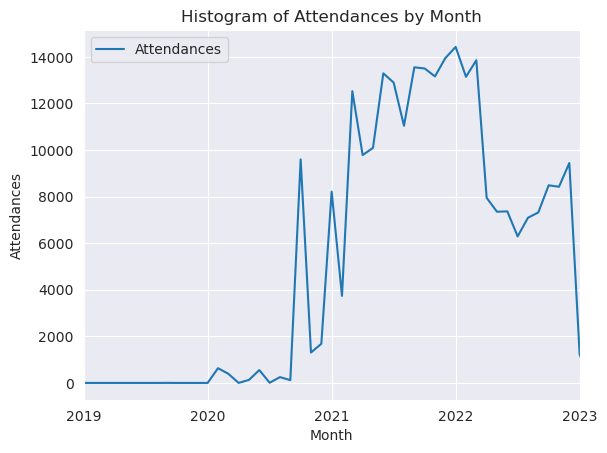

In [286]:
df_attendance_raw_in_date.plot(x='Month', y='Attendances', kind='line')
plt.title('Histogram of Attendances by Month')
plt.xlabel('Month')
plt.xlim('2019-01-01', '2023-01-31')
plt.ylabel('Attendances')
plt.show()

In [287]:
start_time = pd.to_datetime('2020-02-01 00:00:00')
date_range = (df_attendance_raw['in_date'] >= start_time)
df_attendance = df_attendance_raw.loc[date_range]
df_attendance['in_date'].describe()

/tmp/ipykernel_81196/3232552587.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_attendance['in_date'].describe()


count                  262847
unique                   1008
top       2022-01-11 00:00:00
freq                      570
first     2020-02-01 00:00:00
last      2103-08-19 00:00:00
Name: in_date, dtype: object